In [2]:
import keras
print(keras.__version__)

2.1.5


In [4]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


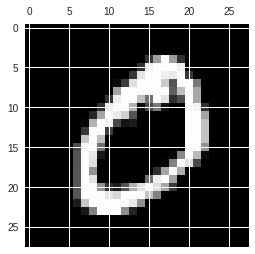

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(train_images[1], cmap="gray")

In [9]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
print(train_labels[1])

0


In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
model.add(layers.Dense(10,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"]
)

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255.0
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255.0

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [22]:
print(train_labels[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [24]:
model.fit(
train_images , train_labels, 
epochs = 5,
batch_size = 128
)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0281 - acc: 0.9915
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0214 - acc: 0.9936
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0167 - acc: 0.9952
Epoch 4/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0124 - acc: 0.9968
Epoch 5/5
10880/60000 [====>.........................] - ETA: 3s - loss: 0.0069 - acc: 0.9986

60000/60000 [==============================] - 5s 82us/step - loss: 0.0099 - acc: 0.9971


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 1s 59us/step
0.06886363311221648 0.9811


In [29]:
import numpy as np
predictions = model.predict(test_images)
print(predictions[0])
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))
print(test_labels[0])
print(np.argmax(test_labels[0]))

[1.6331800e-12 1.5250344e-12 5.7883263e-08 5.9598213e-05 2.2107249e-16
 1.7400694e-09 7.5990078e-20 9.9994016e-01 4.9720644e-08 1.8127039e-07]
1.0000001
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7
